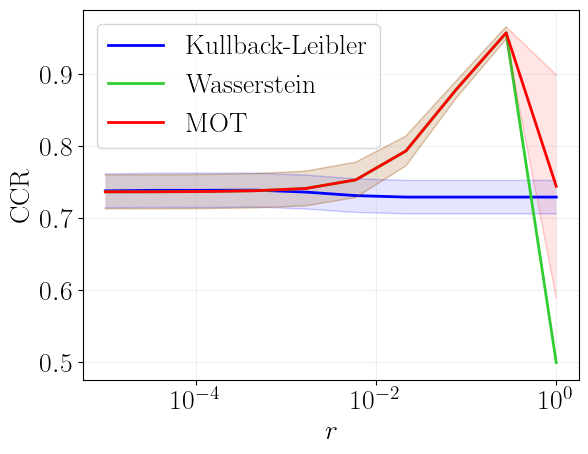

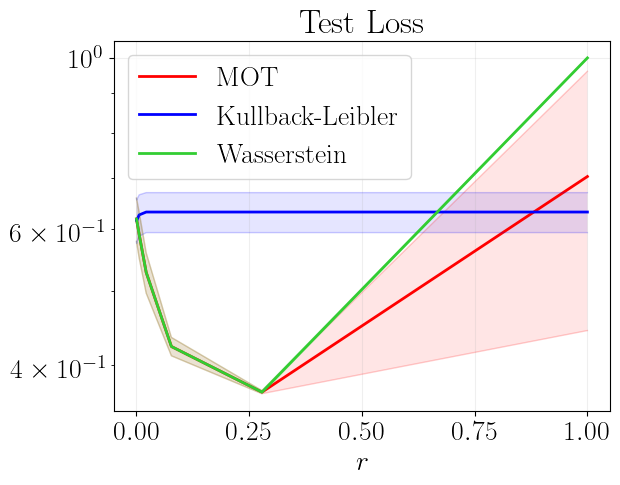

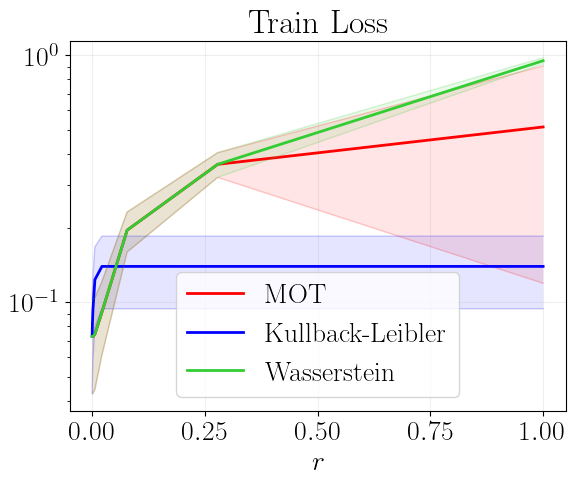

In [2]:
import numpy as np
from utils.plot_utils import plot_results1 as plot_results
import matplotlib.pyplot as plt
replications = 10
p = "inf"
params = {
    'text.usetex': True,
    'font.size': 20,
    'font.family': 'serif', # Matplotlib family name
}
plt.rcParams.update(params)


d = 100
sparsity = 1
N_all = [d]
# , 500]
noise_mag = 0.1
for N in N_all:
    res = np.load("results/NEW_results_simulation_d_{}_N_{}_p_{}_noise_mag_{}_reps_{}.npz".format(d, N, p, noise_mag*10, replications))

    # res = np.load("results/results_simulation_d_{}_sparsity_{}_N_{}_p_{}_reps_{}.npz".format(d, sparsity, N, p, replications))
    plot_results(res, d, N, p, replications, name_file="simulation", save_format="pdf")


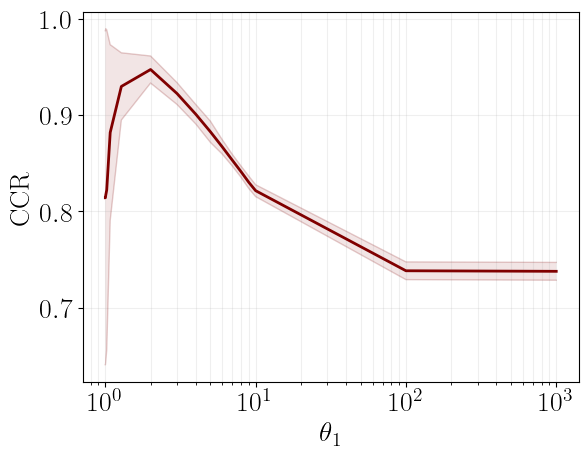

In [3]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from utils.plot_utils import plot_figure

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
d = 100
N = d
sparsity = 1
p = "inf"
replications = 10
res = np.load("results/NEW_theta_performance_theta_d_{}_N_{}_p_{}_reps_{}.npz".format(d, N, p, replications))

theta1s = res["theta1s"]

mot_color = colors["red"]
wass_color = colors["limegreen"]
kl_color = colors["maroon"]

fig, axis = plt.subplots(1, 1)
plot_figure(axis, theta1s[:-2], res["mot_acc"][:-2], color=kl_color)

# axis.legend()

plt.grid(alpha=0.2)
# plt.title("Out-of-sample correct classification rate $n={}$".format(N))
plt.ylabel("CCR")
plt.xlabel(r"$\theta_1$")
plt.xscale("log")

plt.grid(True, which="both", alpha=0.2)
name_file = "theta_performance"
save_format = "pdf"

save_name_format = "_MNIST_d_{}_N_{}_p_{}_reps_{}."
fig.savefig(
    (
        "figures/theta_acc_test_" + name_file + save_name_format + save_format
    ).format(
        d,
        N,
        p,
        replications,
    ),
    format=save_format,
    bbox_inches="tight",
)

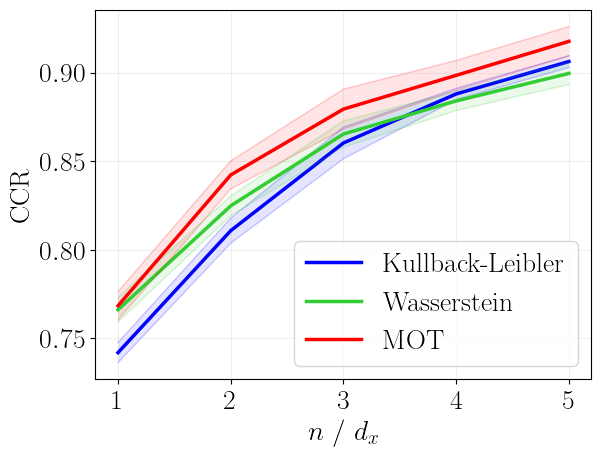

In [9]:
import numpy as np
replications = 10
p = "inf"
d = 100
sparsity_degree = 25
N_all = [d, d*2, d*3, d*4, d*5] 
kl = []
wass = []
mot = []
noise_mag = 0.1

for N in N_all:
    res = np.load("results/NEW_results_dn_simulation_d_{}_N_{}_p_{}_noise_mag_{}_sparsity_deg_{}_reps_{}.npz".format(d, N, p, noise_mag * 10, sparsity_degree, replications))
    kl.append(np.max(res["kl_acc"], axis=0))
    wass.append(np.max(res["wass_acc"], axis=0))
    mot.append(np.max(res["mot_acc"], axis=0))

def plot_figure(plt, x, y, color="b", label=None, linewidth=2.5, with_shade=True):
    mean_ = np.mean(y, axis=1) 
    err_ = np.std(y, axis=1)  * 0.5

    plt.plot(x, mean_, color=color, linewidth=linewidth, label=label)
    plt.plot(x, mean_ + err_, color=color, linewidth=1, alpha=0.2)
    plt.plot(x, mean_ - err_, color=color, linewidth=1, alpha=0.2)
    if with_shade:
        plt.fill_between(x, mean_ - err_, mean_ + err_, alpha=0.1, facecolor=color)


# plt.rcParams.update({"font.size": 12})

mot_color = colors["red"]
kl_color = colors["blue"]
wass_color = colors["limegreen"]


fig, axis = plt.subplots(1, 1)
n_ds = np.array(N_all) / d
plot_figure(axis, n_ds, np.array(kl), kl_color, label="Kullback-Leibler")
plot_figure(axis, n_ds, np.array(wass), wass_color, label="Wasserstein")
plot_figure(axis, n_ds, np.array(mot), mot_color, label="MOT")

axis.legend()

plt.grid(alpha=0.2)
# plt.title("Out-of-sample correct classification rate $n={}$".format(N))
plt.ylabel("CCR")
plt.xlabel(r"$n~/~d_x$")
axis.set_xticks([1, 2, 3, 4, 5])

# plt.xscale("log")

plt.grid(True, which="both", alpha=0.2)
name_file = "theta_performance"
save_format = "pdf"


save_name_format = "_d_{}_p_{}_reps_{}."
fig.savefig(
    (
        "figures/ccr_test_" + name_file + save_name_format + save_format
    ).format(
        d,
        p,
        replications,
    ),
    format=save_format,
    bbox_inches="tight",
)

In [12]:
res["kl_acc"]

array([[0.87336842, 0.86463158, 0.86189474, 0.87894737, 0.86831579],
       [0.87673684, 0.86515789, 0.86347368, 0.88084211, 0.86905263],
       [0.87978947, 0.86863158, 0.86610526, 0.88189474, 0.87084211],
       [0.88389474, 0.87126316, 0.86905263, 0.88378947, 0.87431579],
       [0.88957895, 0.87631579, 0.87389474, 0.88715789, 0.88284211],
       [0.89589474, 0.88010526, 0.88105263, 0.89031579, 0.88926316],
       [0.90157895, 0.88768421, 0.89094737, 0.89831579, 0.89484211],
       [0.90621053, 0.89336842, 0.89536842, 0.90673684, 0.902     ],
       [0.90957895, 0.89915789, 0.89673684, 0.91063158, 0.90336842],
       [0.90873684, 0.90189474, 0.89557895, 0.908     , 0.90136842]])

In [13]:
res["theta_splits"]

array(22)

In [14]:
nmbrs = np.arange(1, 10, 4)

theta1s = np.hstack([1 + np.logspace(-5, 0, 4), nmbrs[2:], 10, 1e3, 1e5])


In [11]:
nmbrs = np.arange(1, 10, 1)
theta1s = np.hstack(
    [1 + np.logspace(-5, 0, 10), nmbrs[2:], 10, 1e2, 1e3, 1e4, 1e5]
)  # Theta1 values to be tuned

In [12]:
theta1s.shape

(22,)

In [13]:
res["kl_acc"]

array([[0.87336842, 0.86463158, 0.86189474, 0.87894737, 0.86831579],
       [0.87673684, 0.86515789, 0.86347368, 0.88084211, 0.86905263],
       [0.87978947, 0.86863158, 0.86610526, 0.88189474, 0.87084211],
       [0.88389474, 0.87126316, 0.86905263, 0.88378947, 0.87431579],
       [0.88957895, 0.87631579, 0.87389474, 0.88715789, 0.88284211],
       [0.89589474, 0.88010526, 0.88105263, 0.89031579, 0.88926316],
       [0.90157895, 0.88768421, 0.89094737, 0.89831579, 0.89484211],
       [0.90621053, 0.89336842, 0.89536842, 0.90673684, 0.902     ],
       [0.90957895, 0.89915789, 0.89673684, 0.91063158, 0.90336842],
       [0.90873684, 0.90189474, 0.89557895, 0.908     , 0.90136842]])